In [1]:
from datetime import datetime

def convert_to_milliseconds(date_time_str):
    """Converts a date-time string in 'YYYY-MM-DD HH:MM:SS' format to milliseconds since epoch."""
    dt = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    milliseconds_since_epoch = int(dt.timestamp() * 1000)
    return milliseconds_since_epoch

# Create Time Graph - ArcGIS Image Servce: Get Samples

410245200000
1672549199000


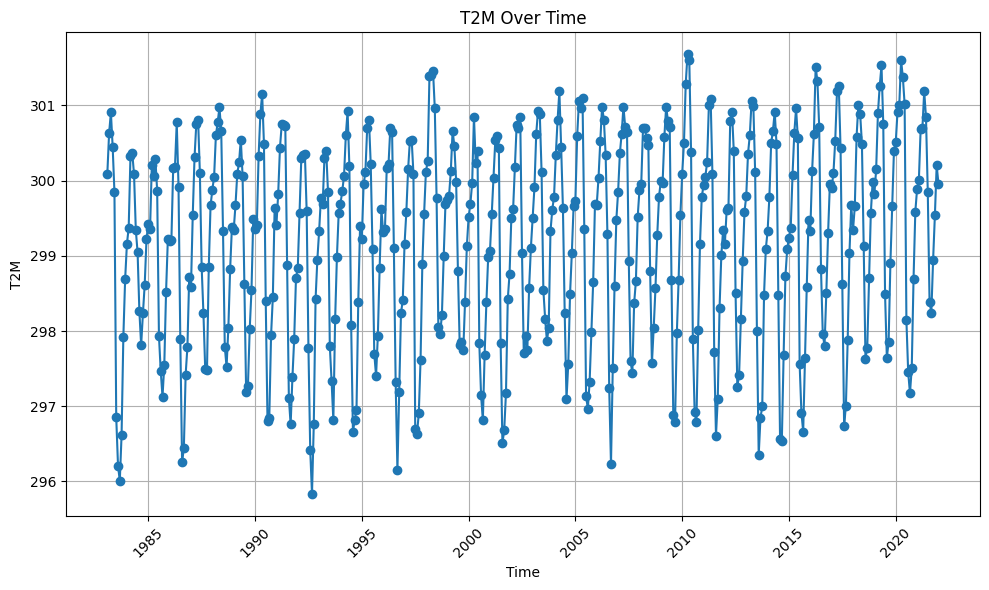

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def convert_to_milliseconds(date_time_str):
    """Converts a date-time string in 'YYYY-MM-DD HH:MM:SS' format to milliseconds since epoch."""
    dt = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    milliseconds_since_epoch = int(dt.timestamp() * 1000)
    return milliseconds_since_epoch

%run "Benchmark option.ipynb"

# User inputs
image_service_url = "https://arcgis.asdc.larc.nasa.gov/server/rest/services/POWER/power_901_monthly_meteorology_utc/ImageServer/getSamples"
variable_name = "T2M"  # Example: "T2M" - TODO retrieve list of variables from MultidimensionalInfo endpoint
start_date_time_str = "1983-01-01 00:00:00" #in 'YYYY-MM-DD HH:MM:SS' format
end_date_time_str = "2022-12-31 23:59:59" #in 'YYYY-MM-DD HH:MM:SS' format

# Convert user input dates to milliseconds since epoch
start_time = convert_to_milliseconds(start_date_time_str)
end_time = convert_to_milliseconds(end_date_time_str)

print(start_time)
print(end_time)

# API URL construction
base_url = image_service_url #TODO remove /getSamples/ from the image_service_url and append it to the base_url
params = {
    "geometry": "0,0",
    "geometryType": "esriGeometryPoint",
    "sampleDistance": "",
    "sampleCount": "",
    "mosaicRule": f'{{"multidimensionalDefinition":[{{"variableName":"{variable_name}"}}]}}',
    "pixelSize": "",
    "returnFirstValueOnly": "false",
    "interpolation": "RSP_BilinearInterpolation",
    "outFields": "",
    "sliceId": "",
    "time": f"{start_time},{end_time}",
    "f": "pjson"
}

# Make the request to the API
response = requests.get(base_url, params=params)
data = response.json()

# Extract relevant information into a DataFrame
samples = [{
    "StdTime": sample["attributes"]["StdTime"],
    variable_name: float(sample["attributes"][variable_name])
} for sample in data["samples"] if "attributes" in sample]

df = pd.DataFrame(samples)

# Convert StdTime from Unix timestamp (milliseconds) to datetime
df['StdTime'] = pd.to_datetime(df['StdTime'], unit='ms')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['StdTime'], df[variable_name], marker='o', linestyle='-')
plt.title(f'{variable_name} Over Time')
plt.xlabel('Time')
plt.ylabel(variable_name)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create Map - ArcGIS Image Servce: Export Image

In [11]:
import folium
from folium.raster_layers import ImageOverlay

# Create a map centered at a given latitude and longitude
m = folium.Map(location=[0, 0], zoom_start=2,)  # Centered on a global view crs="EPSG4326"

# Parameters for the Export Image request
variable_name = "T2M"  # Example variable
#image_date_time_str = "2022-01-01 23:59:59"
#time_milliseconds = convert_to_milliseconds(image_date_time_str)
time_milliseconds = "349747200000"
bbox = "-180%2C-90%2C180%2C90"  # Example bounding box for global coverage
format = "jpgpng"
size = ""  # Example size, adjust as needed
imageSR = ""
bboxSR = ""

# Construct the Export Image URL
export_image_url = f"https://arcgis.asdc.larc.nasa.gov/server/rest/services/POWER/power_901_monthly_meteorology_utc/ImageServer/exportImage?bbox={bbox}&bboxSR={bboxSR}&size={size}&imageSR={imageSR}&time={time_milliseconds}&format={format}&pixelType=F64&noData=&noDataInterpretation=esriNoDataMatchAny&interpolation=RSP_BilinearInterpolation&compression=&compressionQuality=&bandIds=&sliceId=&mosaicRule=%7B%22multidimensionalDefinition%22%3A%5B%7B%22variableName%22%3A%22{variable_name}%22%7D%5D%7D&renderingRule=&adjustAspectRatio=true&validateExtent=false&lercVersion=1&compressionTolerance=&f=image"

# Add ImageOverlay to the map
ImageOverlay(
    image=export_image_url,
    bounds=[[-90, -180], [90, 180]],
    opacity=0.5,
).add_to(m)

# Save the map as an HTML file
m.save('map_with_image_overlay.html')

# Display the map in Jupyter Notebook or JupyterLab
m

In [12]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)